## 1. Import Libraries

In [2]:
# Importing libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

## 2. Data Preparation

### Read the datasets

<b>Read the dataset and print the first five observations.<b>

In [316]:
# load the csv file
df= pd.read_csv("data.csv")

# display the first five observations
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 5   
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 5                 5                2                 5   
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          50                      44.0   
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied  

[5 rows x 24 columns]

<b>Let us now see the number of variables and observations in the data.<b>

In [317]:
print('number of rows : {}'.format(df.shape[0]))
print('number of columns  : {}'.format(df.shape[1]))

number of rows : 25976
number of columns  : 24


<b>Interpretation:</b> The data has 25976 rows and 24 columns that is there are 25976 observations and 24 variables   

In [318]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**Check the data type of each variable & info() of our data**

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25966 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

#### Summary of Descriptive statistics for numerical variable

In [320]:

df.describe().T

count          mean           std   min  \
id                                 25976.0  65005.657992  37611.526647  17.0   
Age                                25976.0     39.620958     15.135685   7.0   
Flight Distance                    25976.0   1193.788459    998.683999  31.0   
Inflight wifi service              25976.0      2.724746      1.335384   0.0   
Departure/Arrival time convenient  25976.0      3.046812      1.533371   0.0   
Ease of Online booking             25976.0      2.756775      1.412951   0.0   
Gate location                      25976.0      2.977094      1.282133   1.0   
Food and drink                     25976.0      3.215353      1.331506   0.0   
Online boarding                    25976.0      3.261665      1.355536   0.0   
Seat comfort                       25976.0      3.449222      1.320090   1.0   
Inflight entertainment             25976.0      3.357753      1.338299   0.0   
On-board service                   25976.0      3.385664      1.282088   0.0   
Leg room service                   25976.0      3.350169      1.318862   0.0   
Baggage handling                   25976.0      3.633238      1.176525   1.0   
Checkin service                    25976.0      3.314175      1.269332   1.0   
Inflight service                   25976.0      3.649253      1.180681   0.0   
Cleanliness                        25976.0      3.286226      1.319330   0.0   
Departure Delay in Minutes         25976.0     14.306090     37.423160   0.0   
Arrival Delay in Minutes           25893.0     14.740857     37.517539   0.0   

                                       25%      50%       75%       max  
id                                 32170.5  65319.5  97584.25  129877.0  
Age                                   27.0     40.0     51.00      85.0  
Flight Distance                      414.0    849.0   1744.00    4983.0  
Inflight wifi service                  2.0      3.0      4.00       5.0  
Departure/Arrival time convenient      2.0      3.0      4.00       5.0  
Ease of Online booking                 2.0      3.0      4.00       5.0  
Gate location                          2.0      3.0      4.00       5.0  
Food and drink                         2.0      3.0      4.00       5.0  
Online boarding                        2.0      4.0      4.00       5.0  
Seat comfort                           2.0      4.0      5.00       5.0  
Inflight entertainment                 2.0      4.0      4.00       5.0  
On-board service                       2.0      4.0      4.00       5.0  
Leg room service                       2.0      4.0      4.00       5.0  
Baggage handling                       3.0      4.0      5.00       5.0  
Checkin service                        3.0      3.0      4.00       5.0  
Inflight service                       3.0      4.0      5.00       5.0  
Cleanliness                            2.0      3.0      4.00       5.0  
Departure Delay in Minutes             0.0      0.0     12.00    1128.0  
Arrival Delay in Minutes               0.0      0.0     13.00    1115.0

#### Summary of Descriptive statistics for categorical variable

In [321]:
# get the summary output for categorical variable
df.describe(include = "object")

Gender   Customer Type   Type of Travel     Class  \
count    25976           25966            25976     25976   
unique       2               3                2         5   
top     Female  Loyal Customer  Business travel  Business   
freq     13172           21170            18038     12490   

                   satisfaction  
count                     25976  
unique                        2  
top     neutral or dissatisfied  
freq                      14573

#### Let us get a count of all the categories in the data.

In [322]:
df.Gender.value_counts()

Female    13172
Male      12804
Name: Gender, dtype: int64

In [323]:
df["Customer Type"].value_counts()

Loyal Customer       21170
disloyal Customer     4794
Disloyal Customer        2
Name: Customer Type, dtype: int64

In [324]:
df["Type of Travel"].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [325]:
df["Class"].value_counts()

Business    12490
Eco         11563
Eco Plus     1916
Eco plus        5
eco             2
Name: Class, dtype: int64

#### We shall now rectify the inconsistencies using the replace()

In [326]:
#Replacing label column "satisfaction" values with 0 and 1 

df["Class"].replace({'eco': "Eco","Eco plus":"Eco Plus"},inplace = True)
df["Customer Type"].replace({'disloyal Customer': "Disloyal Customer"},inplace = True)

In [327]:
df["Customer Type"].value_counts()

Loyal Customer       21170
Disloyal Customer     4796
Name: Customer Type, dtype: int64

**Interpretation:** There are three categories present in the variable. The data has more Loyal Customer 

In [328]:
df["Class"].value_counts()

Business    12490
Eco         11565
Eco Plus     1921
Name: Class, dtype: int64

**Interpretation:** There are three categories present in the variable. Business Class & Eco class data is more or less equal

### Handling the missing data 

In [329]:
# check for null values using isnull()
# isnull(): returns true for a missing data
# values: returns a list of boolean values (output of isnull()) 
# any() returns true if any of the element in the passed list is true
df.isnull().values.any()

True

Let us plot a heatmap of the missing values.


In [330]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

Total   Percent     Type
Arrival Delay in Minutes              83  0.319526  float64
Customer Type                         10  0.038497   object
id                                     0  0.000000    int64
Seat comfort                           0  0.000000    int64
Departure Delay in Minutes             0  0.000000    int64
Cleanliness                            0  0.000000    int64
Inflight service                       0  0.000000    int64
Checkin service                        0  0.000000    int64
Baggage handling                       0  0.000000    int64
Leg room service                       0  0.000000    int64
On-board service                       0  0.000000    int64
Inflight entertainment                 0  0.000000    int64
Online boarding                        0  0.000000    int64
Gender                                 0  0.000000   object
Food and drink                         0  0.000000    int64
Gate location                          0  0.000000    int64
Ease of Online booking                 0  0.000000    int64
Departure/Arrival time convenient      0  0.000000    int64
Inflight wifi service                  0  0.000000    int64
Flight Distance                        0  0.000000    int64
Class                                  0  0.000000   object
Type of Travel                         0  0.000000   object
Age                                    0  0.000000    int64
satisfaction                           0  0.000000   object

**Interpretation:** The above output shows that there are missing values in the data ("Arrival Delay in Minutes","Customer Type").

In [331]:
# check the head of the column
df["Arrival Delay in Minutes"].head(10)

0    44.0
1     0.0
2     0.0
3     6.0
4    20.0
5     0.0
6     0.0
7    65.0
8     0.0
9    14.0
Name: Arrival Delay in Minutes, dtype: float64

In [332]:
# check the head of the column
df["Customer Type"].head(10)

0       Loyal Customer
1       Loyal Customer
2    Disloyal Customer
3       Loyal Customer
4       Loyal Customer
5       Loyal Customer
6       Loyal Customer
7       Loyal Customer
8       Loyal Customer
9       Loyal Customer
Name: Customer Type, dtype: object

In [333]:
# Imputing missing value with mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [334]:
# Imputing missing value with mode
df["Customer Type"] = df["Customer Type"].fillna(df["Customer Type"].mode()[0])

In [335]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Interpretation:** The above output shows that there are no missing values in the data.

### Outlier Analysis and Treatment

In [336]:
df_num=df.select_dtypes(include='number')
df_num.head(10)

id  Age  Flight Distance  Inflight wifi service  \
0  19556   52              160                      5   
1  90035   36             2863                      1   
2  12360   20              192                      2   
3  77959   44             3377                      0   
4  36875   49             1182                      2   
5  39177   16              311                      3   
6  79433   77             3987                      5   
7  97286   43             2556                      2   
8  27508   47              556                      5   
9  62482   46             1744                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   
5                                  3                       3              3   
6                                  5                       5              5   
7                                  2                       2              2   
8                                  2                       2              2   
9                                  2                       2              2   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               3                4             3                       5   
1               5                4             5                       4   
2               2                2             2                       2   
3               3                4             4                       1   
4               4                1             2                       2   
5               5                5             3                       5   
6               3                5             5                       5   
7               4                4             5                       4   
8               5                5             5                       5   
9               3                4             4                       4   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   
5                 4                 3                 1                1   
6                 5                 5                 5                4   
7                 4                 4                 4                5   
8                 2                 2                 5                3   
9                 4                 4                 4                5   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   
5                 2            5                           0   
6                 5            3                           0   
7                 4            3                          77   
8                 3            5                           1   
9                 4            4                          28   

   Arrival Delay in Minutes  
0                      44.0  
1                       0.0  
2                       0.0  
3        

In [337]:
df_cat=df.select_dtypes(exclude='number')
df_cat.head(10)

Gender      Customer Type   Type of Travel     Class  \
0  Female     Loyal Customer  Business travel       Eco   
1  Female     Loyal Customer  Business travel  Business   
2    Male  Disloyal Customer  Business travel       Eco   
3    Male     Loyal Customer  Business travel  Business   
4  Female     Loyal Customer  Business travel       Eco   
5    Male     Loyal Customer  Business travel       Eco   
6  Female     Loyal Customer  Business travel  Business   
7  Female     Loyal Customer  Business travel  Business   
8    Male     Loyal Customer  Business travel       Eco   
9  Female     Loyal Customer  Business travel  Business   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied  
5                satisfied  
6                satisfied  
7                satisfied  
8                satisfied  
9                satisfied

#### Check the outliers in all the variables and treat them using appropriate techniques.

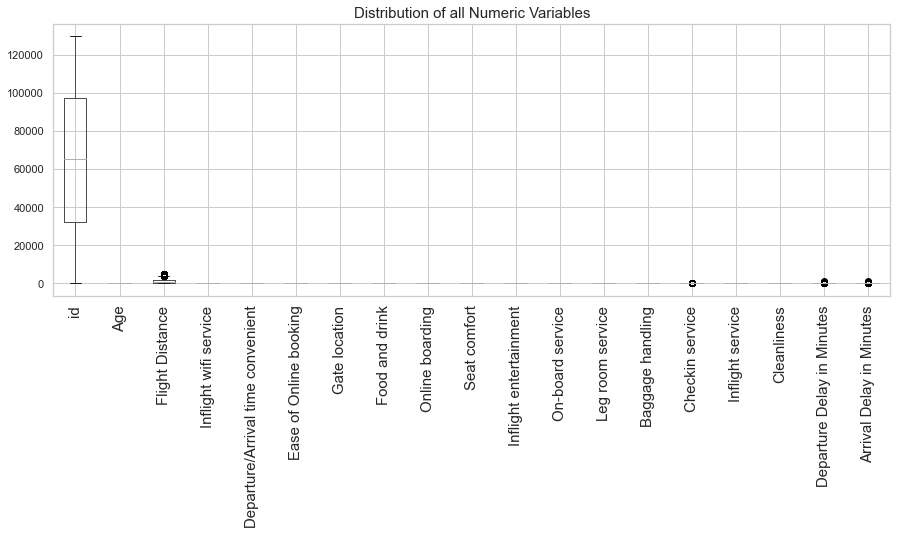

In [338]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

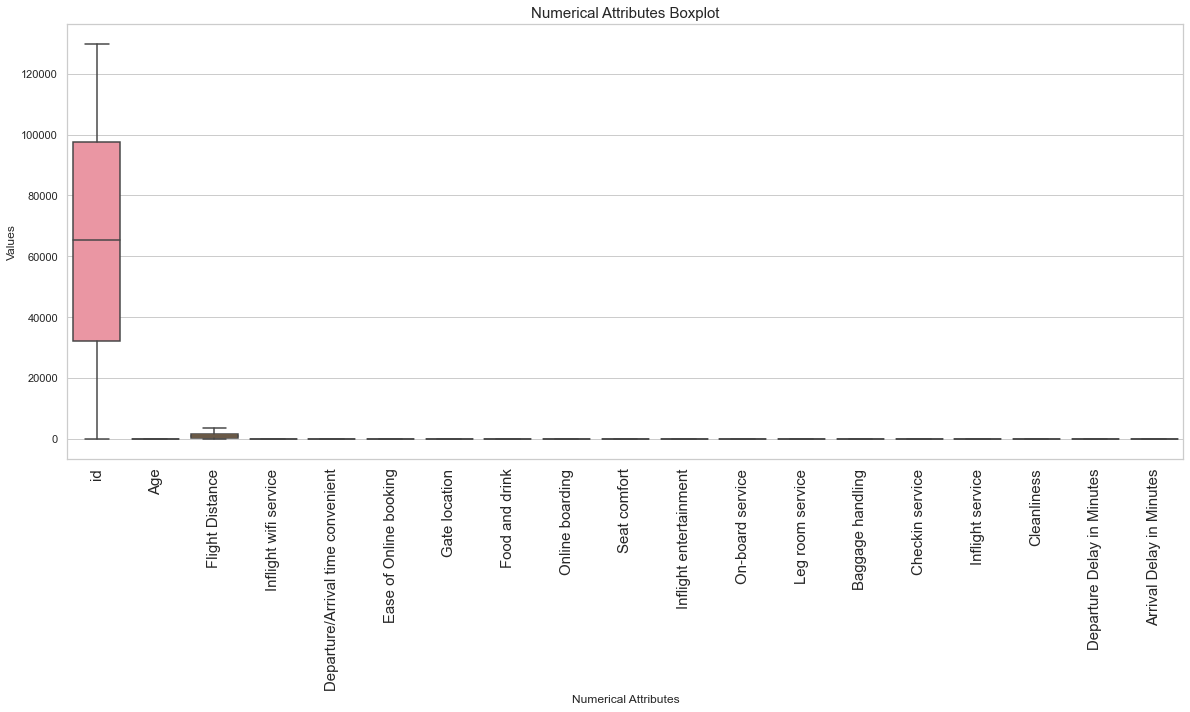

In [339]:
plt.figure(figsize=(20,8))
sns.set_palette("RdPu")
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

### Distribution of Variables

#### Distribution of dependent variable.

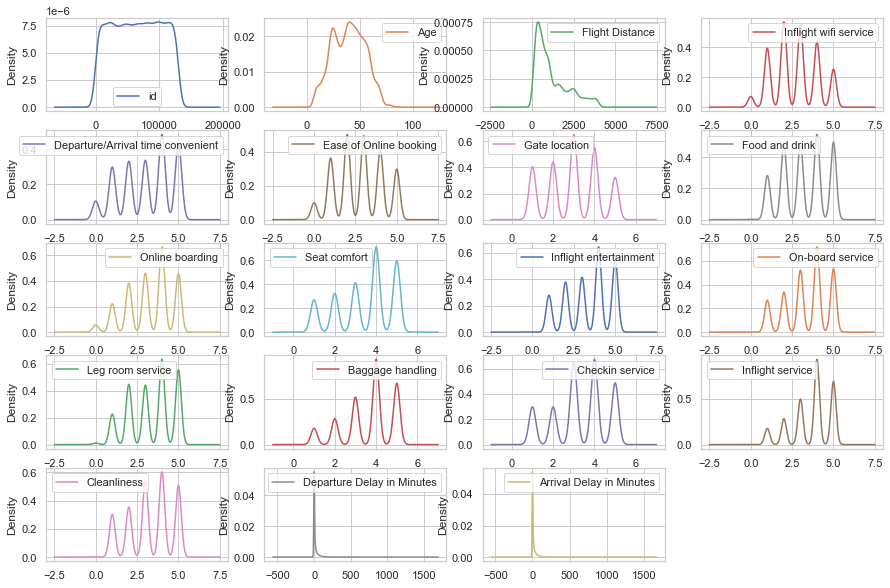

In [340]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False)

# show plot
plt.show()

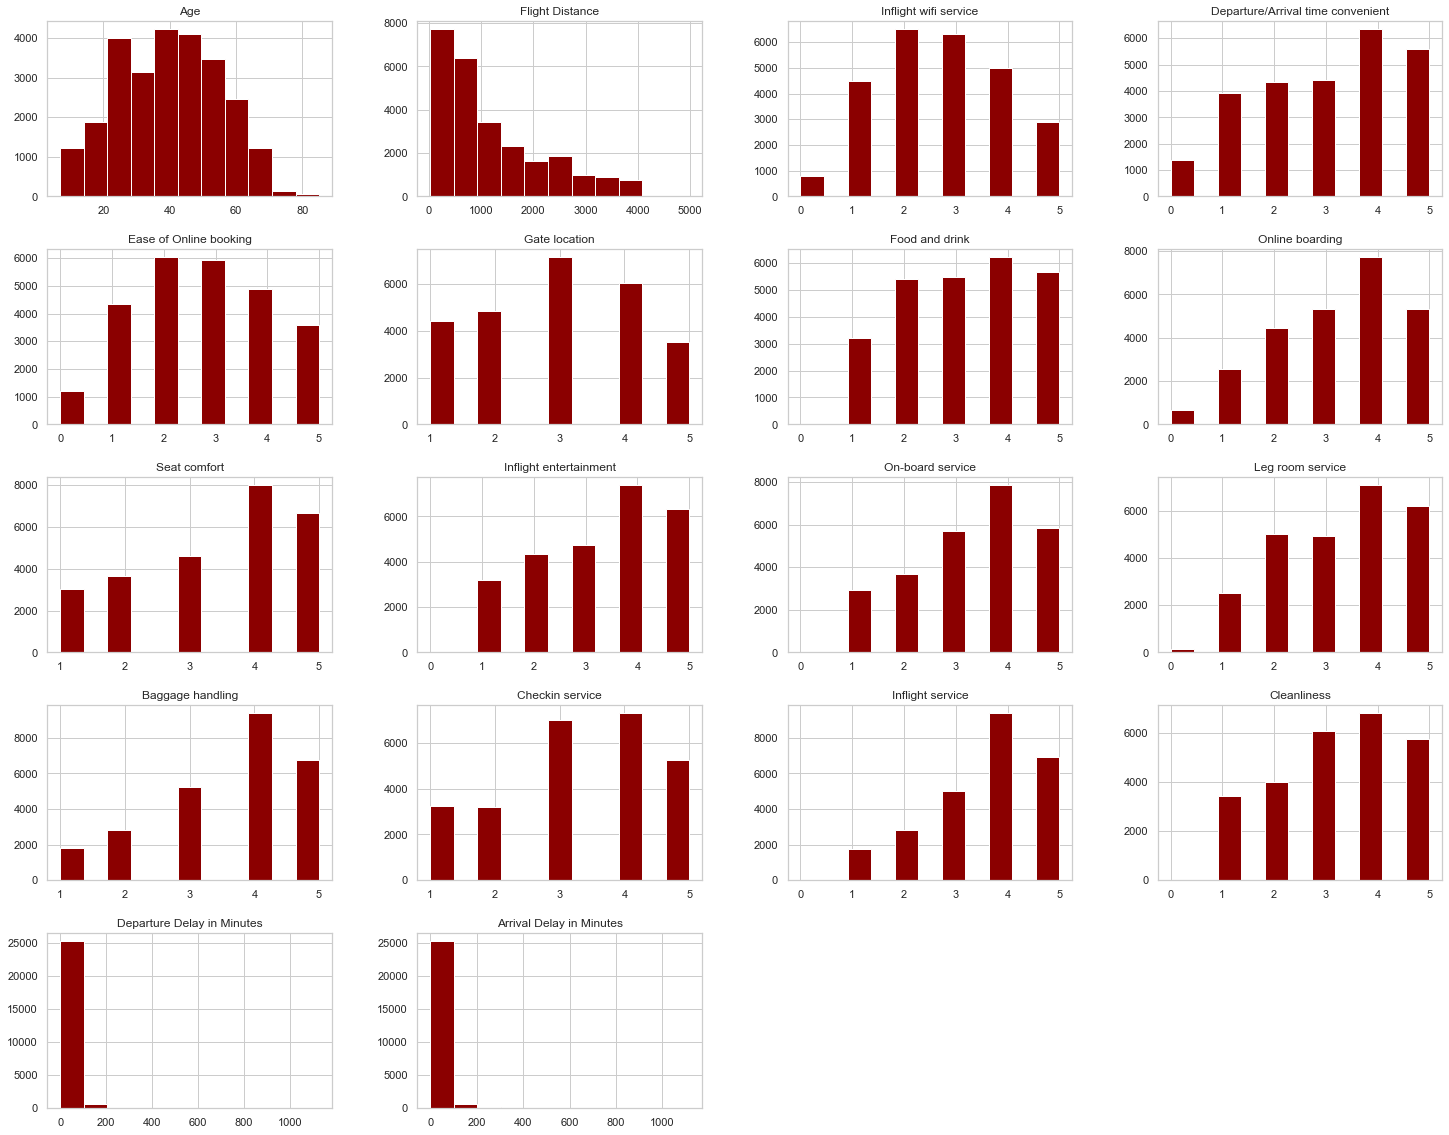

In [341]:
binwidth=2
df.iloc[:,1:].hist(bins=11, figsize=(25,20), color='darkred')
plt.show()

### Exploratory Data Analysis

#### Replacing label column "satisfaction" values with 0 and 1 

In [342]:
#Replacing label column "satisfaction" values with 0 and 1 

df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [343]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  Disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 5   
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 5                 5                2                 5   
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          50                      44.0   
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   

   satisfaction  
0             1  
1             1  
2             0  
3             1  
4             1  

[5 rows x 24 columns]

### Check for the nature of dataset - balanced or imbalanced

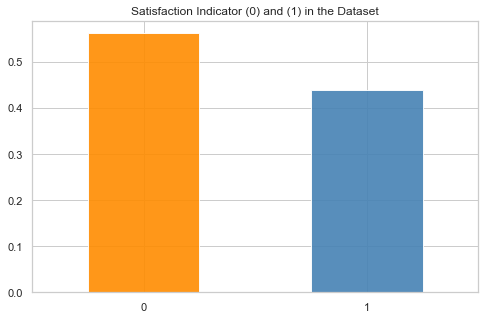

In [344]:
fig = plt.figure(figsize = (8,5))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special resampling methods to be implemented.

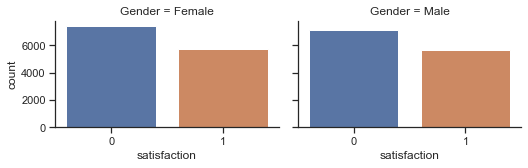

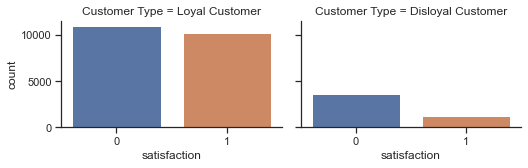

In [345]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)

**Gender:**
It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

**Customer Type:**
Even among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

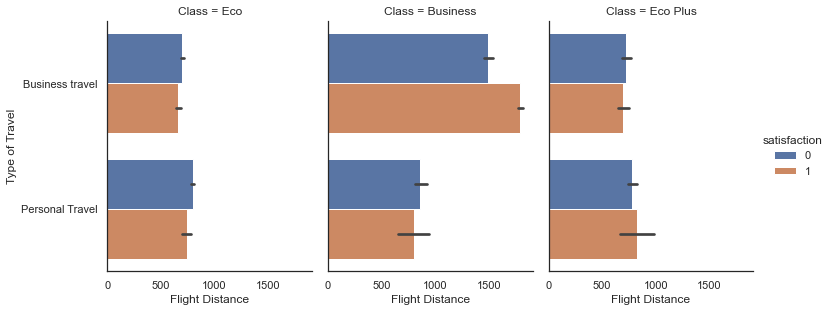

In [346]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

**Type of Travel and Flight Distance grouped by Class:**
For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

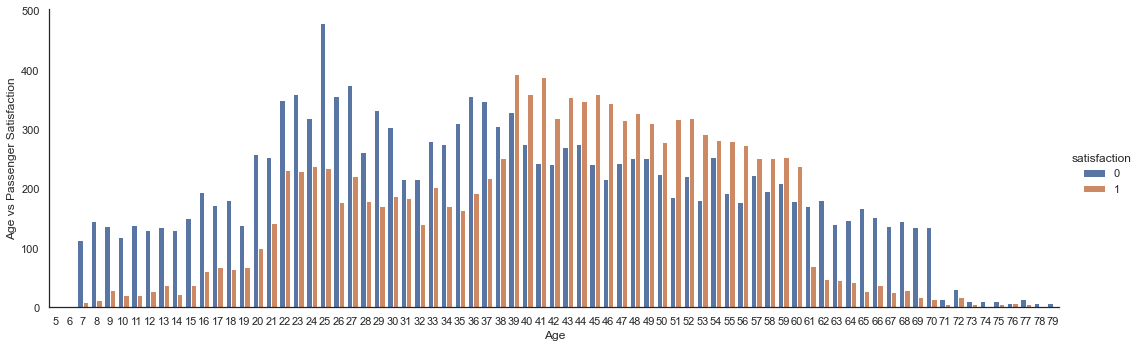

In [347]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

**Age:**
From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

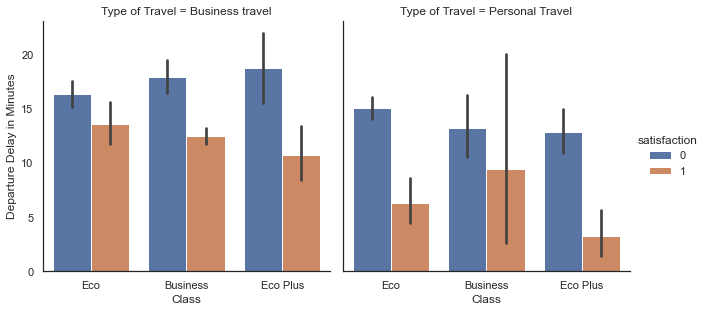

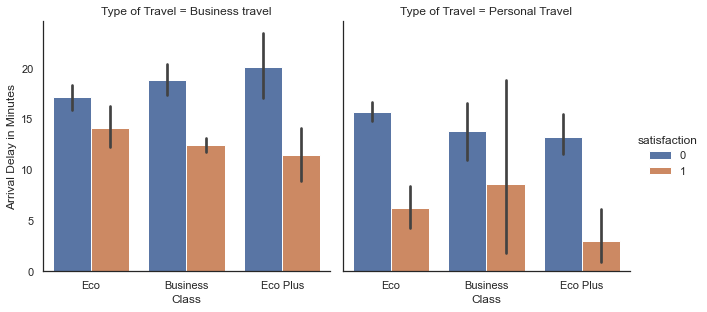

In [348]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=1.0)


**Departure Delay, Arrival Delay grouped by Type of Travel:**
For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers.

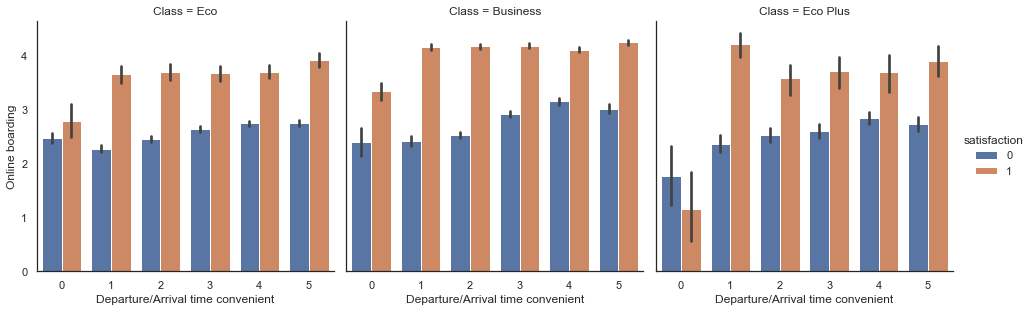

In [349]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=1.0)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class:**
For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side. For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

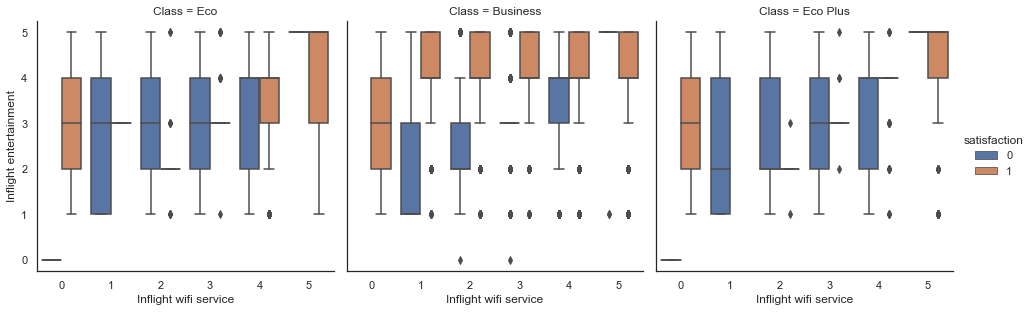

In [350]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=1.0)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:**
Eco Plus passengers are mostly satisfied without inflight wi-fi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

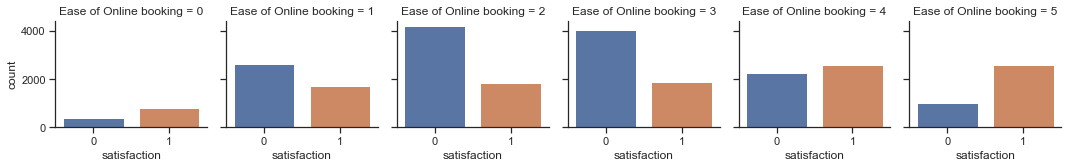

In [351]:
# Ease_of_Online_booking
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df, kind="count", height=2.5, aspect=1.0)

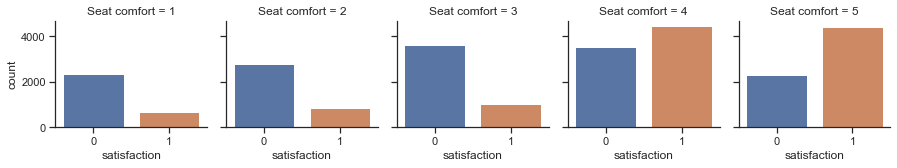

In [352]:
# Seat_comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df, kind="count", height=2.5, aspect=1.0)

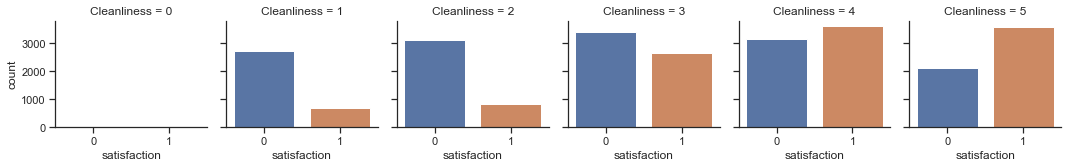

In [353]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df, kind="count", height=2.5, aspect=1.0)

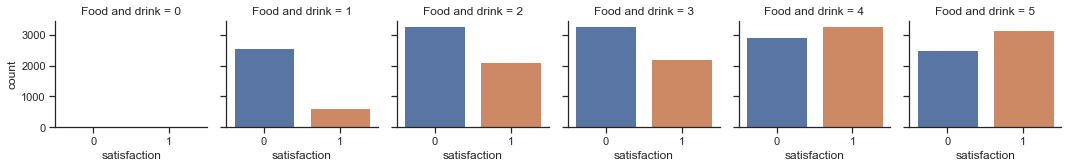

In [354]:

# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=df, kind="count", height=2.5, aspect=1.0)

**Ease of Online Booking, Seat Comfort, Cleanliness & Food and Drink:**
For all of these four features, maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

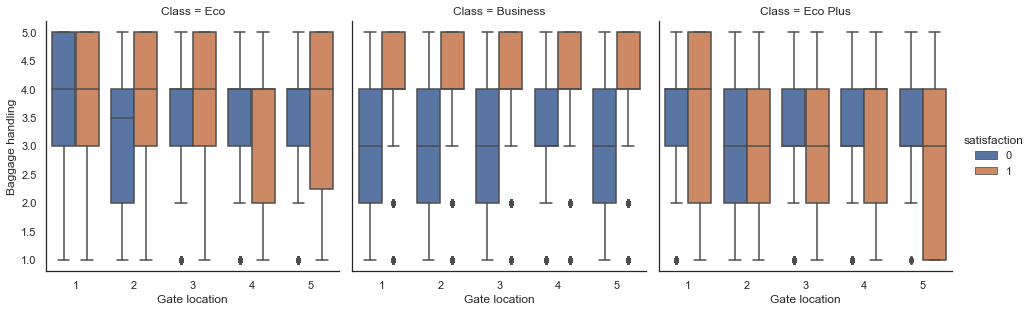

In [355]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=1.0)

**Gate Location and Baggage Handling grouped by Class:**
For business class passengers, it is observed that all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4). For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied.

<AxesSubplot:xlabel='Inflight service', ylabel='satisfaction'>

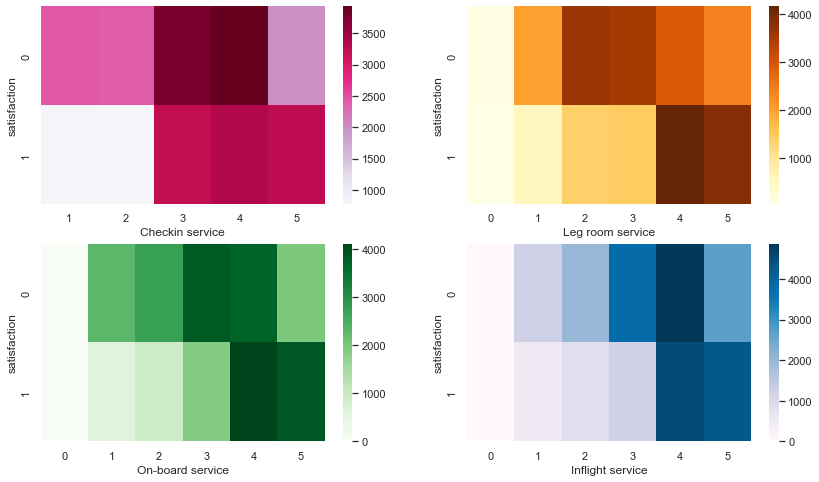

In [356]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(df['satisfaction'], df['Checkin service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Leg room service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'],df['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'],df['Inflight service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

**checkin Service, Leg-room Service, On-board Service and Inflight Service:**
For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

### Finding Correlation among Features

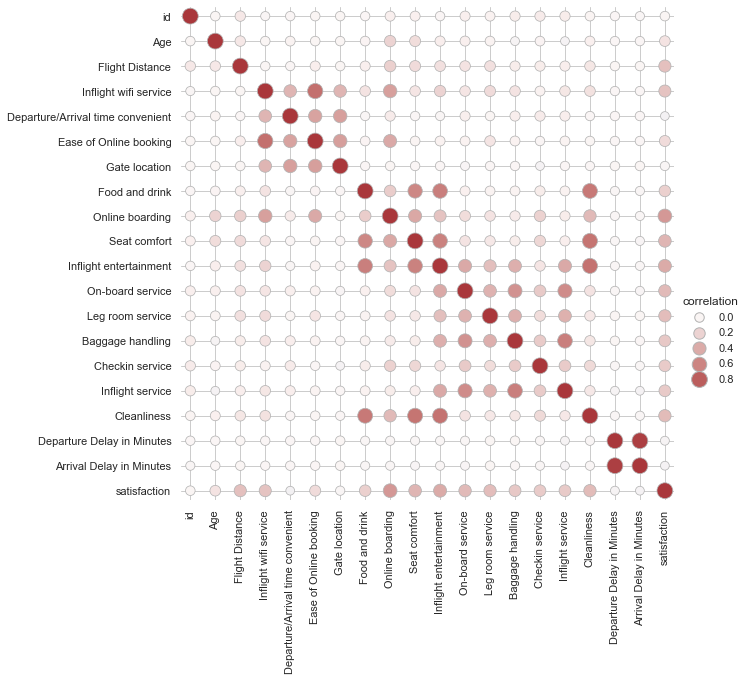

In [357]:
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [358]:
correlation = df.corr()

<AxesSubplot:>

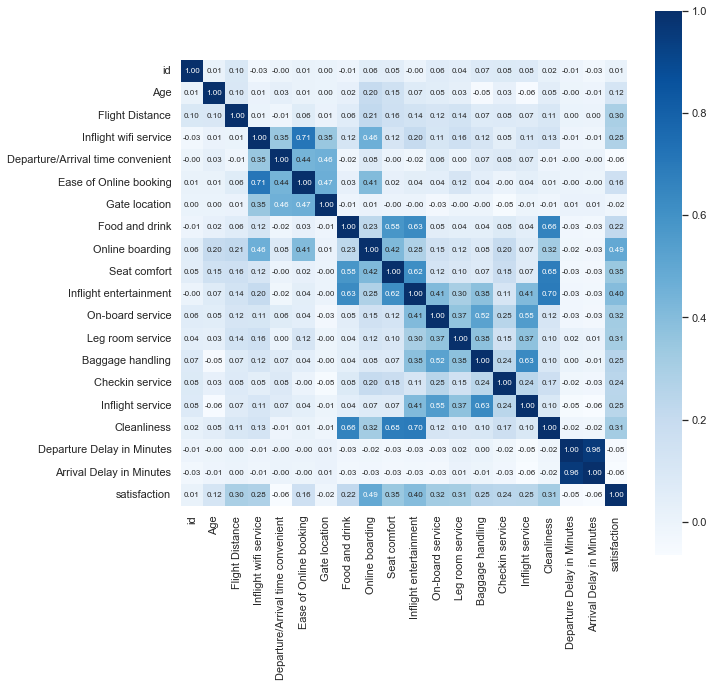

In [359]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

### Treatment and Removal of Outliers

Detecting outliers using the Inter Quantile Range(IQR)

In [360]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                   65413.75
Age                                     24.00
Flight Distance                       1330.00
Inflight wifi service                    2.00
Departure/Arrival time convenient        2.00
Ease of Online booking                   2.00
Gate location                            2.00
Food and drink                           2.00
Online boarding                          2.00
Seat comfort                             3.00
Inflight entertainment                   2.00
On-board service                         2.00
Leg room service                         2.00
Baggage handling                         2.00
Checkin service                          1.00
Inflight service                         2.00
Cleanliness                              2.00
Departure Delay in Minutes              12.00
Arrival Delay in Minutes                13.00
satisfaction                             1.00
dtype: float64


In [361]:
# Removal of outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(18706, 24)

In [362]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  Disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   
8  27508    Male     Loyal Customer   47  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   
8              556                      5                                  2   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   
8                       2  ...                       5                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   
8                 2                 5                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   
8            5                           1                       0.0   

   satisfaction  
1             1  
2             0  
3             1  
4             1  
8             1  

[5 rows x 24 columns]

### Label Encoding of Categorical Variables

In [363]:
# For
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [364]:
df.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
1  90035       0              1   36               0      0             2863   
2  12360       1              0   20               0      1              192   
3  77959       1              1   44               0      0             3377   
4  36875       0              1   49               0      1             1182   
8  27508       1              1   47               0      1              556   

   Inflight wifi service  Departure/Arrival time convenient  \
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   
8                      5                                  2   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   
8                       2  ...                       5                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   
8                 2                 5                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   
8            5                           1                       0.0   

   satisfaction  
1             1  
2             0  
3             1  
4             1  
8             1  

[5 rows x 24 columns]

### Selection of top 10 features using Chi-Square

### Scale the Data 

#### MinMax Scalar

In [368]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head(10)

id  Gender  Customer Type       Age  Type of Travel  Class  \
0  0.693193     0.0            1.0  0.371795             0.0    0.0   
1  0.095049     1.0            0.0  0.166667             0.0    0.5   
2  0.600200     1.0            1.0  0.474359             0.0    0.0   
3  0.283829     0.0            1.0  0.538462             0.0    0.5   
4  0.211697     1.0            1.0  0.512821             0.0    0.5   
5  0.481018     0.0            1.0  0.500000             0.0    0.0   
6  0.889673     0.0            1.0  0.333333             0.0    0.0   
7  0.923841     0.0            1.0  0.500000             0.0    0.0   
8  0.017380     0.0            1.0  0.576923             0.0    0.0   
9  0.172902     1.0            1.0  0.551282             1.0    0.5   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0         0.763754                    0.2                                0.2   
1         0.043420                    0.4                                0.0   
2         0.902373                    0.0                                0.0   
3         0.310410                    0.4                                0.6   
4         0.141586                    1.0                                0.4   
5         0.461974                    0.4                                0.4   
6         0.079288                    0.4                                1.0   
7         0.263754                    1.0                                1.0   
8         0.241100                    0.4                                0.4   
9         0.014024                    0.6                                0.8   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                     0.6  ...                     0.8               0.8   
1                     0.4  ...                     0.4               0.8   
2                     0.0  ...                     0.2               0.2   
3                     0.8  ...                     0.4               0.4   
4                     0.4  ...                     1.0               0.4   
5                     0.4  ...                     0.8               0.8   
6                     1.0  ...                     0.4               0.4   
7                     1.0  ...                     1.0               1.0   
8                     0.4  ...                     0.8               0.8   
9                     0.0  ...                     0.4               0.8   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0               0.8              0.75         0.333333               0.8   
1               0.2              0.50         0.000000               0.4   
2               0.2              0.00         0.333333               0.2   
3               0.4              0.25         0.666667               0.4   
4               0.4              1.00         0.333333               0.6   
5               0.8              0.75         1.000000               0.8   
6               0.4              0.25         0.333333               0.4   
7               1.0              1.00         1.000000               1.0   
8               0.8              0.75         0.333333               0.8   
9               0.4              0.75         0.666667               1.0   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0         1.00                    0.000000                   0.00000   
1         0.25                    0.000000                   0.00000   
2         0.75                    0.000000                   0.18750   
3         0.75                    0.000000                   0.62500   
4         1.00                    0.033333                   0.00000   
5         0.75                    0.933333                   0.43750   
6         0.75                    0.600000                   0.21875   
7         0.50                    0.000000                   0.00000   
8         1.00          

In [369]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=12)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness'],
      dtype='object')


#### Importance of feature using Wrapper Method

In [371]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']
[0.03043198 0.0046963  0.03744237 0.0321215  0.10781065 0.10610976
 0.04214391 0.14162654 0.0182869  0.03892524 0.01536241 0.0109484
 0.15295457 0.04472263 0.05027684 0.02697256 0.03463328 0.02024509
 0.02075127 0.01869763 0.02603856 0.00904991 0.0097517 ]


**'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment'**
Only these six features are inherently important in contributing towards the customer or passenger satisfaction. Another feature importance deciding method is also used to cross check the results obtained in this method.

#### Feature Permutation Importance

In [372]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

From all the above results, we can conclude the list of important features that affects the customer or passenger satisfaction.

*Most Important Features:*
Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort,Customer Type

*Other Important Features:*
Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handlin

## Building Models

In [373]:
 df.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
1  90035       0              1   36               0      0             2863   
2  12360       1              0   20               0      1              192   
3  77959       1              1   44               0      0             3377   
4  36875       0              1   49               0      1             1182   
8  27508       1              1   47               0      1              556   

   Inflight wifi service  Departure/Arrival time convenient  \
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   
8                      5                                  2   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   
8                       2  ...                       5                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   
8                 2                 5                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   
8            5                           1                       0.0   

   satisfaction  
1             1  
2             0  
3             1  
4             1  
8             1  

[5 rows x 24 columns]

### Splitting features and Target


In [374]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

In [375]:
df_features=df[['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']]

In [376]:
df_features

Type of Travel  Inflight wifi service  Online boarding  Seat comfort  \
1                   0                      1                4             5   
2                   0                      2                2             2   
3                   0                      0                4             4   
4                   0                      2                1             2   
8                   0                      5                5             5   
...               ...                    ...              ...           ...   
25970               0                      1                1             4   
25971               0                      3                3             4   
25972               0                      4                4             4   
25973               1                      2                1             2   
25974               0                      3                4             4   

       Flight Distance  Inflight entertainment  On-board service  \
1                 2863                       4                 4   
2                  192                       2                 4   
3                 3377                       1                 1   
4                 1182                       2                 2   
8                  556                       5                 2   
...                ...                     ...               ...   
25970              432                       4                 5   
25971              526                       4                 3   
25972              646                       4                 4   
25973              828                       2                 4   
25974             1127                       4                 3   

       Leg room service  Cleanliness  Checkin service  Inflight service  \
1                     4            5                3                 4   
2                     1            2                2                 2   
3                     1            4                3                 1   
4                     2            4                4                 2   
8                     2            5                3                 3   
...                 ...          ...              ...               ...   
25970                 2            4                2                 3   
25971                 2            4                4                 5   
25972                 5            4                5                 5   
25973                 3            2                5                 4   
25974                 2            4                4                 5   

       Baggage handling  
1                     4  
2                     3  
3                     1  
4                     2  
8                     5  
...                 ...  
25970                 5  
25971                 4  
25972                 5  
25973                 4  
25974                 5  

[18706 rows x 12 columns]

In [377]:
X = df_features
Y = df['satisfaction']

In [378]:
X.head()

Type of Travel  Inflight wifi service  Online boarding  Seat comfort  \
1               0                      1                4             5   
2               0                      2                2             2   
3               0                      0                4             4   
4               0                      2                1             2   
8               0                      5                5             5   

   Flight Distance  Inflight entertainment  On-board service  \
1             2863                       4                 4   
2              192                       2                 4   
3             3377                       1                 1   
4             1182                       2                 2   
8              556                       5                 2   

   Leg room service  Cleanliness  Checkin service  Inflight service  \
1                 4            5                3                 4   
2                 1            2                2                 2   
3                 1            4                3                 1   
4                 2            4                4                 2   
8                 2            5                3                 3   

   Baggage handling  
1                 4  
2                 3  
3                 1  
4                 2  
8                 5

In [379]:
Y.head()

1    1
2    0
3    1
4    1
8    1
Name: satisfaction, dtype: int64

In [380]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [382]:
print(X.shape, X_train.shape, X_test.shape)

(18706, 12) (14964, 12) (3742, 12)


In [383]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [384]:
 X_train

array([[ 1.4670742 , -0.55275431, -0.97331197, ...,  0.36066613,
         1.07731398,  1.10377987],
       [-0.68162878,  1.65984013,  1.2203782 , ..., -0.65533688,
         0.21789792,  1.10377987],
       [-0.68162878,  0.92230865,  0.48914815, ..., -1.67133989,
         0.21789792, -0.61128809],
       ...,
       [-0.68162878, -1.29028579, -1.70454202, ...,  1.37666914,
         1.07731398,  0.24624589],
       [ 1.4670742 ,  0.92230865,  0.48914815, ...,  0.36066613,
         0.21789792,  1.10377987],
       [-0.68162878,  0.18477717, -0.24208191, ..., -0.65533688,
        -0.64151813, -0.61128809]])

In [385]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    RocCurveDisplay.from_estimator(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### Logistic Regression

Accuracy = 0.8511491181186531
ROC Area under Curve = 0.8501728652723665
Time taken = 0.07683634757995605
              precision    recall  f1-score   support

           0    0.85636   0.86539   0.86085      1991
           1    0.84509   0.83495   0.83999      1751

    accuracy                        0.85115      3742
   macro avg    0.85072   0.85017   0.85042      3742
weighted avg    0.85109   0.85115   0.85109      3742



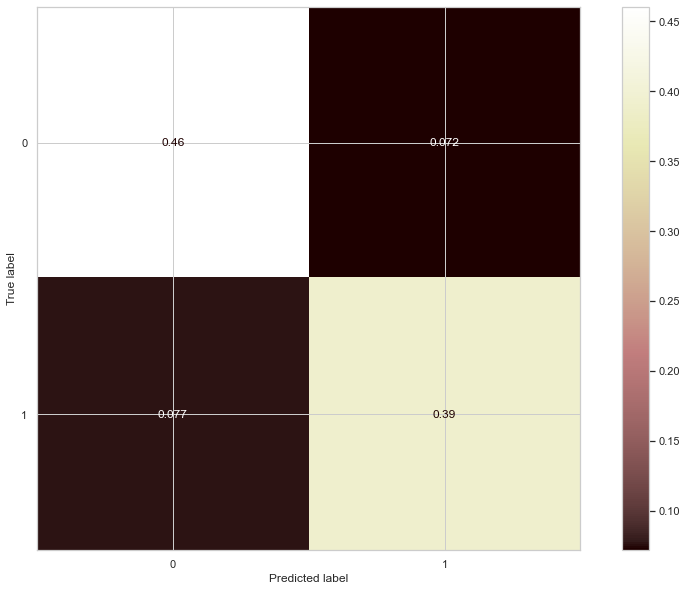

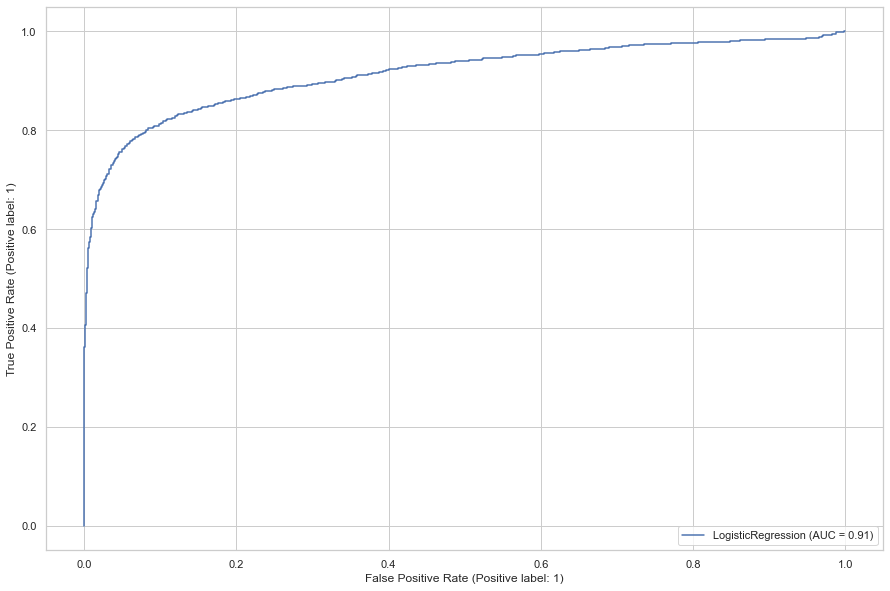

In [386]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [387]:

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.384864
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                14964
Model:                          Logit   Df Residuals:                    14952
Method:                           MLE   Df Model:                           11
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.4438
Time:                        23:11:51   Log-Likelihood:                -5759.1
converged:                       True   LL-Null:                       -10355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1072      0.026    -42.523      0.000      -1.158      -1.056
x2             0.1547      0.

It can be seen that among the 12 features, except 11th feature (Inflight serive), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable (passenger satisfaction).
A pseudo R-square value (McFadden's Pseudo R-Squared Value) of 0.44 represents an excellent fit.

### Naive Bayes Classifier

Accuracy = 0.8484767504008551
ROC Area under Curve = 0.8472140910510777
Time taken = 0.008479595184326172
              precision    recall  f1-score   support

           0    0.85108   0.86690   0.85892      1991
           1    0.84539   0.82753   0.83636      1751

    accuracy                        0.84848      3742
   macro avg    0.84824   0.84721   0.84764      3742
weighted avg    0.84842   0.84848   0.84837      3742



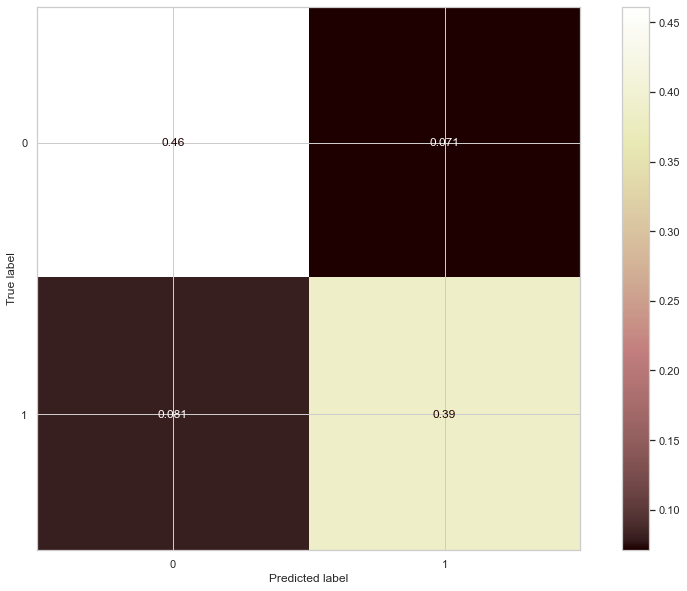

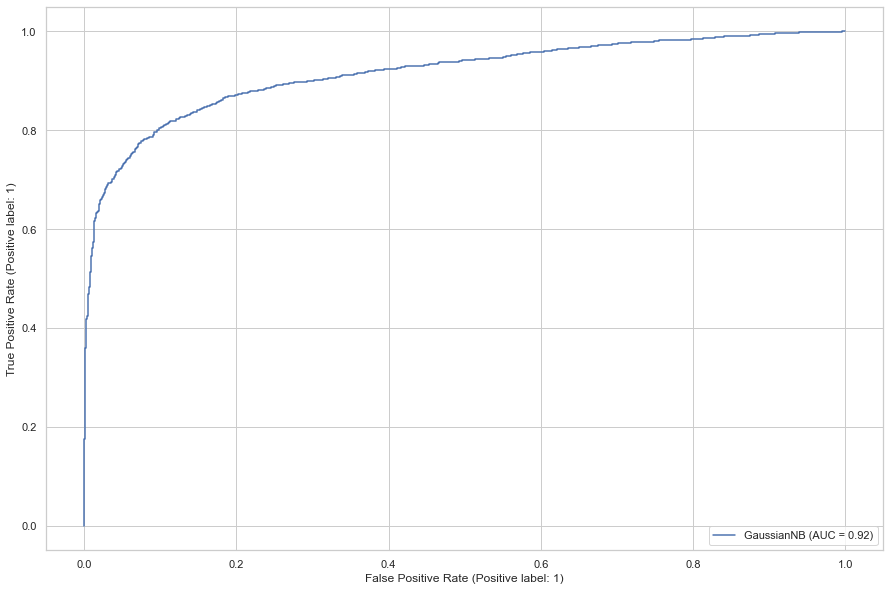

In [388]:

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

### K-Nearest Neighbor Classifier

Accuracy = 0.9094067343666489
ROC Area under Curve = 0.9059862757623468
Time taken = 0.5340116024017334
              precision    recall  f1-score   support

           0    0.88100   0.95932   0.91849      1991
           1    0.94854   0.85266   0.89805      1751

    accuracy                        0.90941      3742
   macro avg    0.91477   0.90599   0.90827      3742
weighted avg    0.91260   0.90941   0.90892      3742



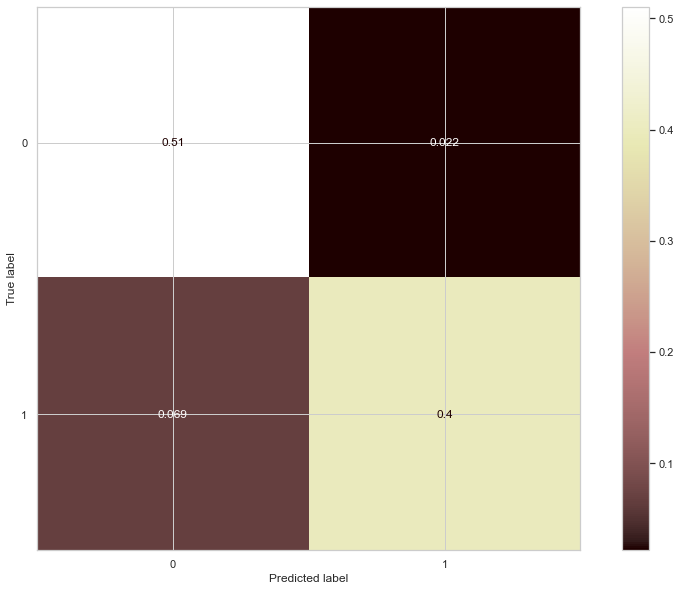

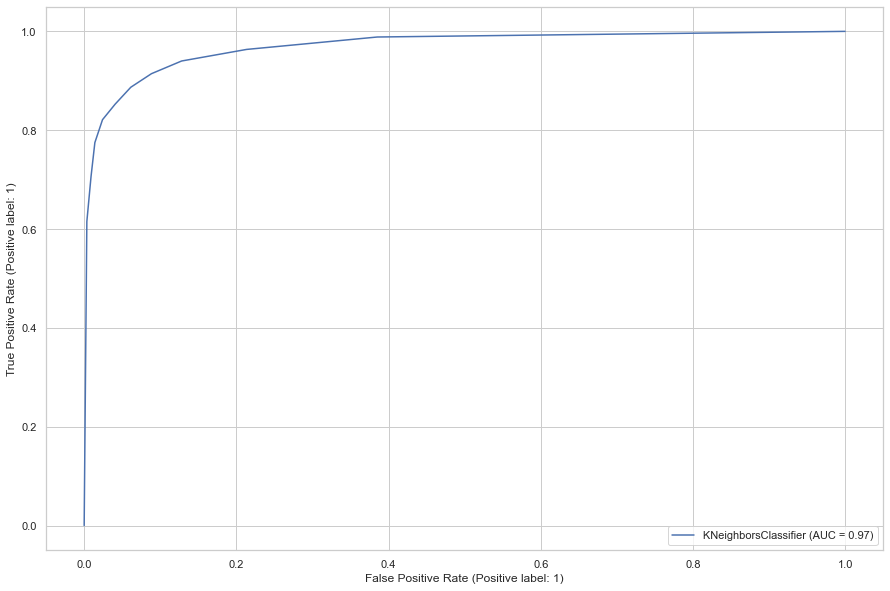

In [389]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### Decision Tree Classifier

Accuracy = 0.9211651523249599
ROC Area under Curve = 0.9206157864588249
Time taken = 0.021824121475219727
              precision    recall  f1-score   support

           0    0.92315   0.92918   0.92616      1991
           1    0.91887   0.91205   0.91545      1751

    accuracy                        0.92117      3742
   macro avg    0.92101   0.92062   0.92080      3742
weighted avg    0.92115   0.92117   0.92115      3742



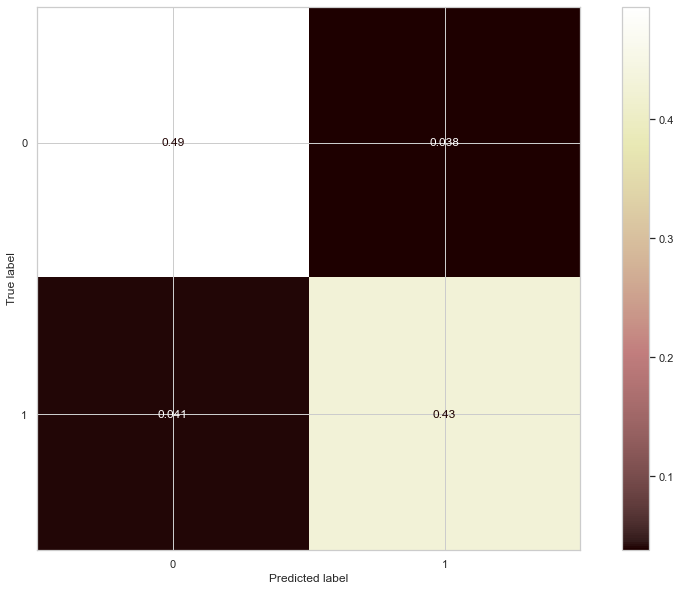

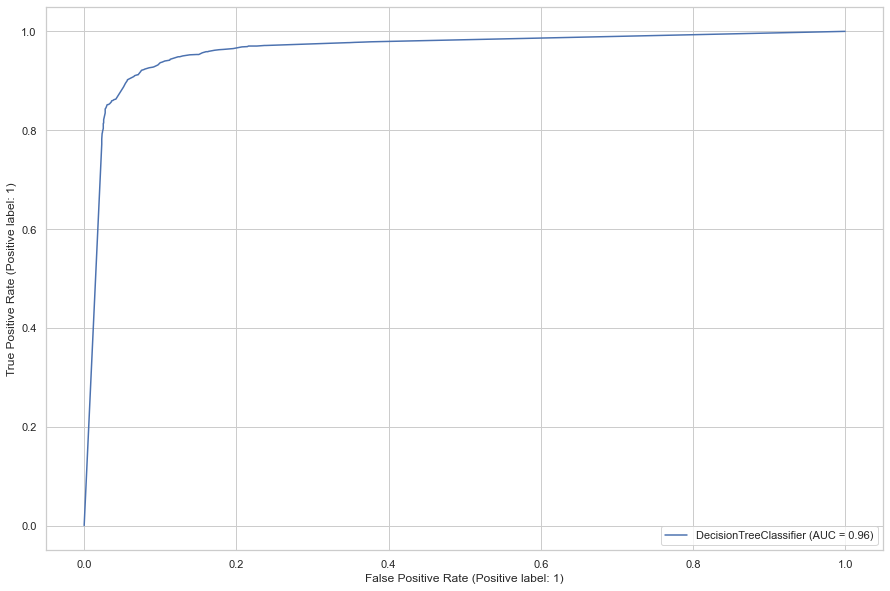

In [390]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### Neural Network

Accuracy = 0.9278460716194549
ROC Area under Curve = 0.9272726699043468
Time taken = 5.358073711395264
              precision    recall  f1-score   support

           0    0.92875   0.93621   0.93247      1991
           1    0.92680   0.91833   0.92255      1751

    accuracy                        0.92785      3742
   macro avg    0.92778   0.92727   0.92751      3742
weighted avg    0.92784   0.92785   0.92782      3742



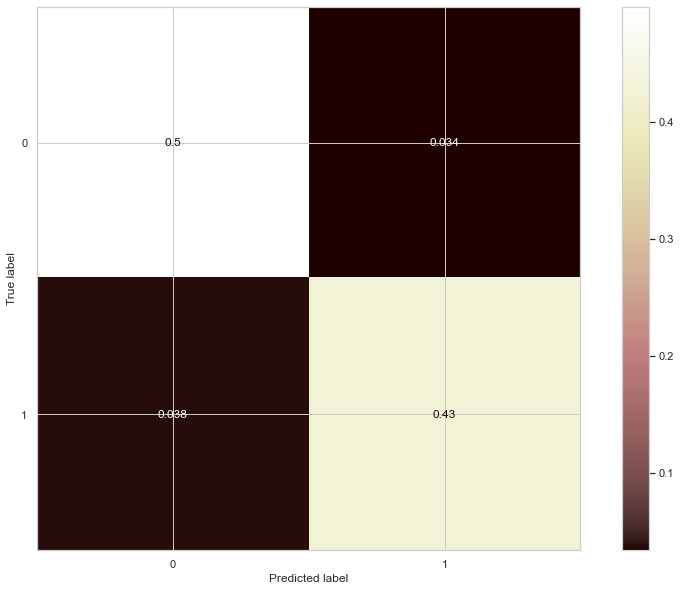

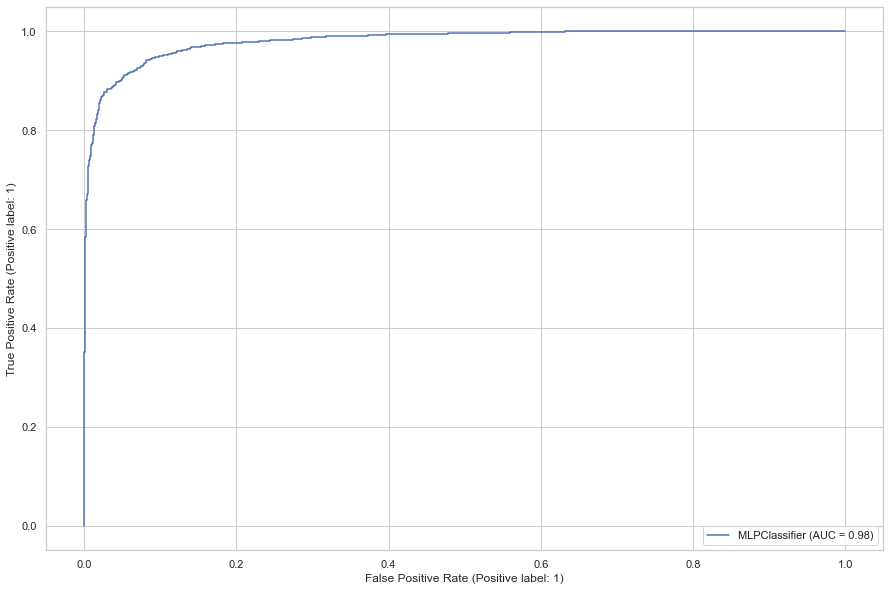

In [391]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

### Random Forest

Accuracy = 0.9438802779262426
ROC Area under Curve = 0.9429600535361726
Time taken = 1.6943352222442627
              precision    recall  f1-score   support

           0    0.93845   0.95731   0.94779      1991
           1    0.95032   0.92861   0.93934      1751

    accuracy                        0.94388      3742
   macro avg    0.94439   0.94296   0.94356      3742
weighted avg    0.94401   0.94388   0.94384      3742



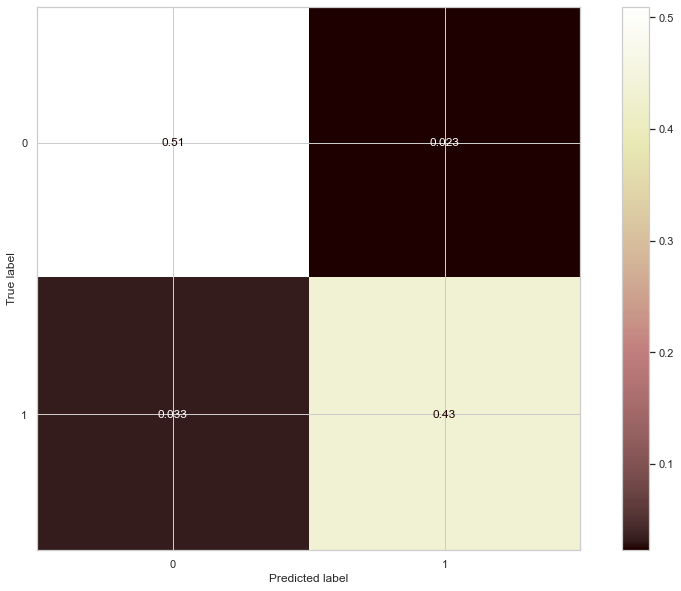

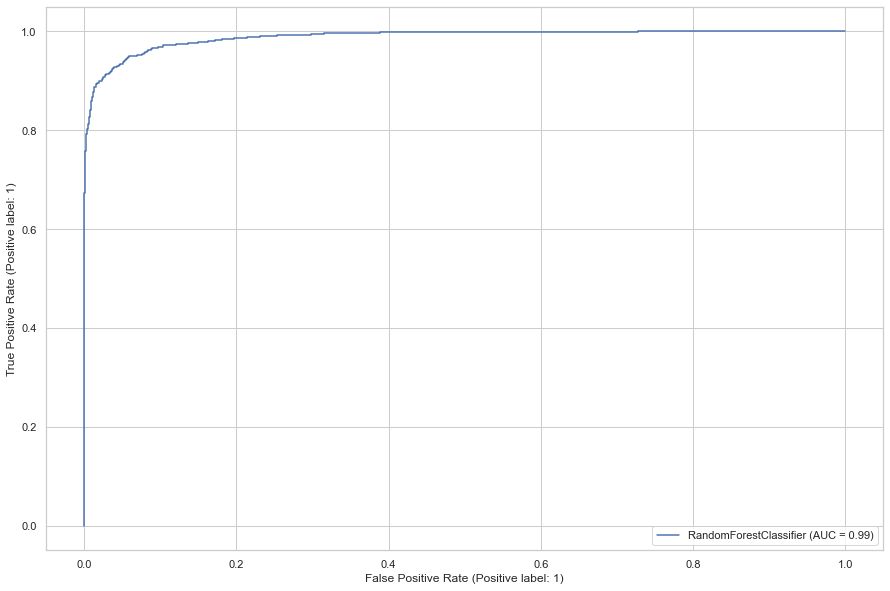

In [392]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

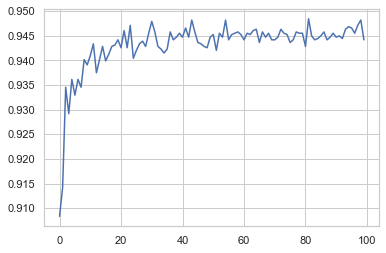

In [393]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

### Extreme Gradient Boosting

Accuracy = 0.9388027792624265
ROC Area under Curve = 0.9379476347160165
Time taken = 4.9806342124938965
              precision    recall  f1-score   support

           0    0.93485   0.95128   0.94299      1991
           1    0.94347   0.92461   0.93395      1751

    accuracy                        0.93880      3742
   macro avg    0.93916   0.93795   0.93847      3742
weighted avg    0.93888   0.93880   0.93876      3742



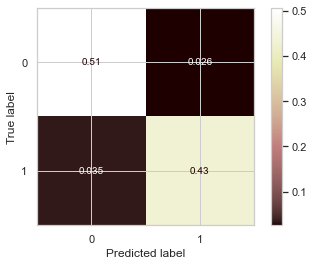

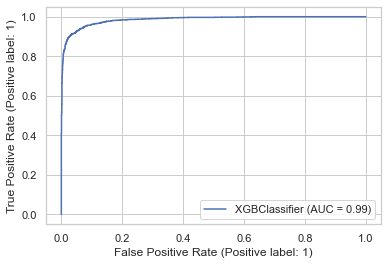

In [394]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Adaptive Gradient Boosting

Accuracy = 0.918492784607162
ROC Area under Curve = 0.9177946963505966
Time taken = 5.816032409667969
              precision    recall  f1-score   support

           0    0.91899   0.92868   0.92381      1991
           1    0.91792   0.90691   0.91238      1751

    accuracy                        0.91849      3742
   macro avg    0.91845   0.91779   0.91809      3742
weighted avg    0.91849   0.91849   0.91846      3742



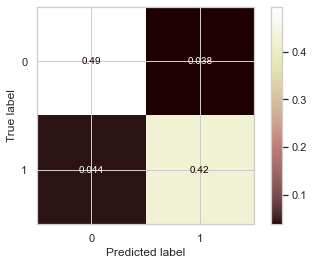

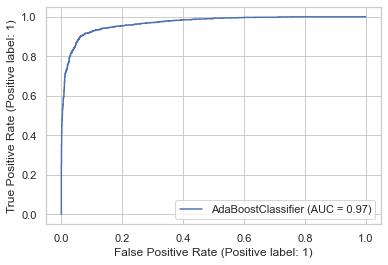

In [395]:
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

### Decision Region Plotting for Different Models

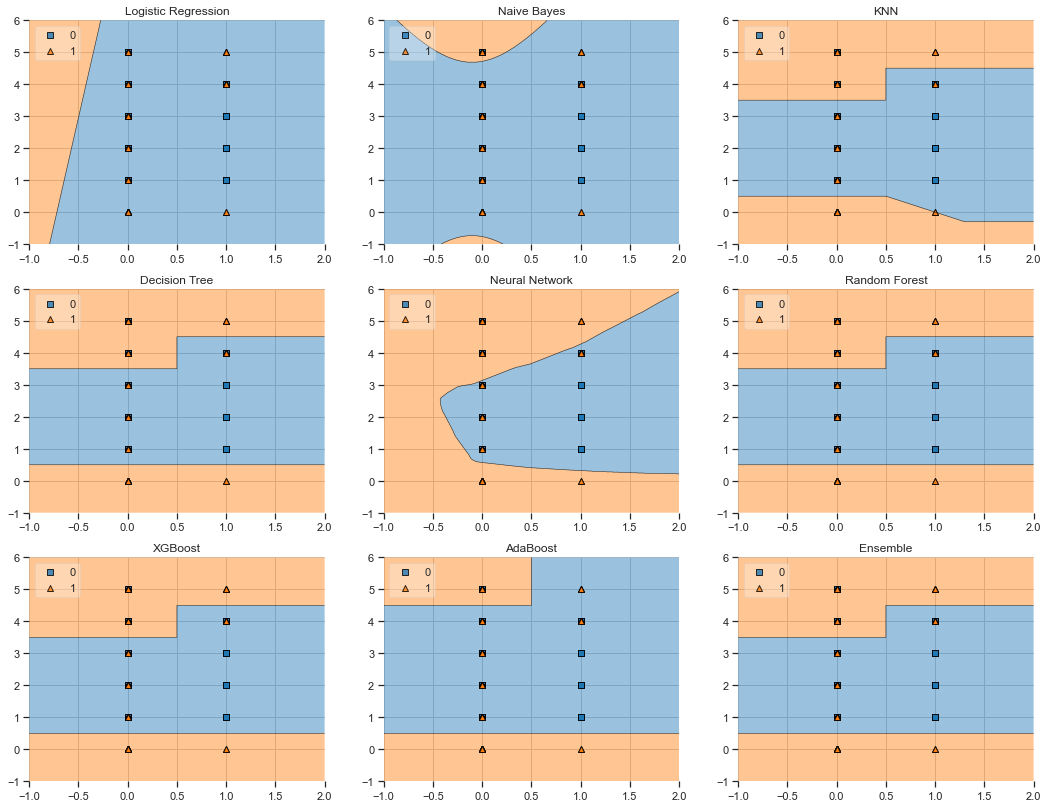

In [396]:
value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

# Considering only the most important features
X_list = df[["Type of Travel", "Inflight wifi service", "Online boarding", "Seat comfort"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = df["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

## Model Comparison

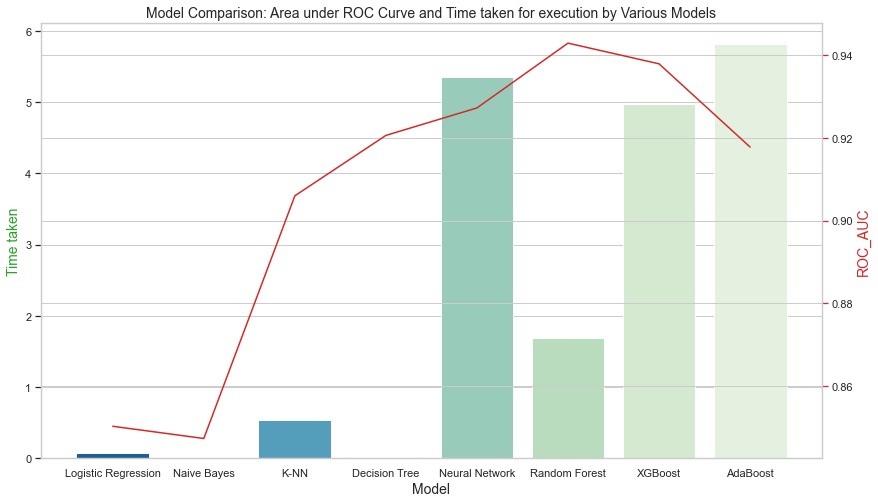

In [397]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [398]:
import pickle
with open('model_xgboost.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

In [1]:
import pickle
from flask import Flask, request, jsonify

# load the saved model
with open('model_xgboost.pkl', 'rb') as f:
    model = pickle.load(f)

# create the Flask app
app = Flask(__name__)

# define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # get the input data from the request
    input_data = request.json['input']

    # make a prediction using the loaded model
    prediction = model.predict(input_data)

    # return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

# run the app
if __name__ == '__main__':
    app.run(host="0.0.0.0",post=8001)

ImportError: cannot import name 'escape' from 'jinja2' (D:\Anaconda\lib\site-packages\jinja2\__init__.py)

** ImportError: cannot import name 'escape' from 'jinja2' (D:\Anaconda\lib\site-packages\jinja2\__init__.py) - 

"Regarding the ImportError issue I mentioned above, I've tried several solutions to resolve it, including all possible way to deploy my model. However, I haven't been able to find a solution that works so far. I'm continuing to investigate and explore different options, but I wanted to let you know that I've already put in a lot of effort into trying to fix this." I'm always eager to expand my knowledge and skillset, and I'm committed to investing the time and effort required to become proficient in this area. I can assure you that if given the opportunity, I'll work hard & accomplish the goal that assign to me" **

In [237]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [238]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [240]:
pip install --upgrade flask

  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.0.2
    Uninstalling Werkzeug-2.0.2:
      Successfully uninstalled Werkzeug-2.0.2
  Attempting uninstall: flask
    Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
Note: you may need to restart the kernel to use updated packages.


In [241]:
pip install --upgrade jinja2

Note: you may need to restart the kernel to use updated packages.
